**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2023

# Uranium Mill Network Dynamics Simulation Report
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Students:** Kyle Rizzuto, Robert Townsend, Jacob Duprey, Kevin McMenemy <br>
**Course:** Engy-4390 Nuclear Systems Design and Analysis  <br>
**Mentor:** Prof. Valmor F. de Almeida

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**27Sep2023**

[Project Repository on `GitHub`](https://github.com/dpploy/engy-4390/tree/main/projects/u-mill)

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Objectives](#obj)
* [Tools](#tools)
* [Approach and Dynamics Equations](#app)
* [Challenges & Course Corrections](#correct)
* [Initialization of Process Modules](#IPM)
  + [Leaching](#leach)
  + [Decantation/Filtration](#clear)
  + [Solvent Extraction/Stripping](#solvent)
  + [Precipitation](#precip)
  + [Evaporation/Calcining](#evap)
* [Startup](#su)
* [Steady-State](#ss)
* [Disturbance](#malfunction)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

<font color="red">vfda: This needs to be beefed up.</font>

&nbsp;&nbsp; Yellowcake is a material produced from uranium during the milling process. It is a mixture of different types of uranium oxide that combine to form a yellow tinted compound. This material is vital in the formation of reactor fuel in the later steps of the process known as uranium conversion. The two main processes used to recover uranium from the ground are In-Situ leaching and open-pit mining. In-Situ mining, which involves the injection of acid into the ground that dissolves uranium before being brought back to the surface in a pipe, is vastly more used in the US than open-pit because it allows a direct recovery of uranium without the need for digging out uranium bearing rock and moving it to a separate facility for processing. This does limit the places that the method can be used because the acid can contaminate groundwater if it is allowed to travel too deep. Once the uranium is pulled from the ground, it undergoes chemical separations to isolate the oxides.

&nbsp;&nbsp;The general unit operations that follow the mining of the ore are size reduction (crushing/grinding), then acid leaching. The acid leaching process uses acidic and alkaline aqueous solutions with agitation for four to 48 hours at ambient temperature. Usually sulfuric acid is used and results in a final liquor with a pH of 1.5. Manganese dioxide is typically then used with the liquor to result in [UO2(SO4)3]2- The resulting uranium-oxide containing ions must then be separated using either a solvent extraction or ion exchange. The ion exchange usually uses an ion-exchange resin along with any of a variety of processing equipment such as fixed or moving bed along with another chemical solution to “sorb” the complex ion from the leach solution. Solvent extraction involves using alkyl phosphoric acids and alkyl amides as solvents to remove the ions containing uranium from their leach solution. The uranium oxide must then be precipitated from the solutions created by the solvent extraction or ion exchange. The resulting “yellow cake” as it is commonly referred to is a mix of uranium oxides which is then shipped to a final purification facility.[4]

&nbsp;&nbsp;Yellow cake, which is about 90% U3O8, is then chemically processed into uranium tetrafluoride (UF4) through a process called hydrofluorination. This reaction mechanism consists of heating beds of solid uranium oxide in an environment of gaseous hydrofluoric acid and stripping away the oxide layers until only UF4 remains. HF is typically used in a 20% stoichiometric excess to maximize the conversion percentage of U3O8 to at least 98%. Before the uranium can be enriched however, the UF4 must be further converted into UF6, also known as uranium hexafluoride. This is because enrichment is largely dependent on gaseous centrifugal separation, and UF6 does not possess a liquid form under standard pressure conditions. Uranium fluorides are also the preferred form for enrichment because fluorine only exists in one natural isotope, meaning that the heavier molecules will always contain the Uranium-238.

&nbsp;&nbsp;&nbsp;&nbsp;Python code will be used to develop dynamic comprehensive systems that accurately represent the milling process as well as the complex parts of the plant that simulate a steady state reactor. This involves both mathematical models of the system’s material streams and visual representations of the data on a time dependent basis. Deliverable content will be prepared using Jupyter notebooks to seamlessly integrate working code with descriptive markdown text.  

&nbsp;&nbsp;&nbsp;&nbsp;There are environmental and non-proliferation applications that come from developing a dynamic model simulating the steps of the uranium fuel cycle. For instance, disturbances to the system can be modeled to determine the impact on the immediate processes involved as well as the cascading effects on the next steps of the cycle. This information can lead to engineers designing risk mitigating and preventative measures that can make the system safer for operation and for the environment. This application is useful for the everchanging frontier of finite resource management. A major example is the White Mesa uranium mill in Utah, which already has a system in place where they take in low level radioactive waste from companies and reprocess it using their heap leaching treatment methods. If natural sources of uranium become depleted over the years, it is vital to understand and develop alternative methods of fuel production from nuclear waste as well as other uranium remnant sources. 

&nbsp;&nbsp;The White Mesa Uranium Mill in Utah is the sole producer of uranium oxide in the United States, and operates using a heap based leaching approach. For the purposes of this model, we have selected White Mesa as the basis for the creation of modules. Upon examination of the flowsheet diagram created by White Mesa available in a 1993 IAEA report on the state of uranium milling, we have elected to model the following five unit operations in the milling process:leaching, clarification, solvent extraction, precipitation, and drying. These operations effectively encapsulate the majority of losses and operating costs in the uranium milling process, and capture both the very first and final stages of raw ore preparation in the production of uranium oxide.[3]


<font color="red">Where is the flowsheet? Which plant? How about the documents that needed to be reviewed? IAEA document with plants?</font>

## [Objectives](#toc)<a id="obj"></a>

- Python code will be used to develop dynamic comprehensive systems that accurately represent the milling process as well as the complex parts of the plant that simulate a steady state reactor. This involves both mathematical models of the system’s material streams and visual representations of the data on a time dependent basis. 
- Modules to model the leaching, filtration, solvent extraction, precipitation, and evaporation steps will be developed.
- Deliverable content will be prepared using Jupyter notebooks to seamlessly integrate working code with descriptive markdown text.  
- A flowsheet based on White Mesa will be developed as the basis for our modules



## [Tools](#toc)<a id="tools"></a>

For this project we will be utilizing GitHub to store a remote repository of our python code and project report. GitHub is a version control software that programmers use to share and work on coding projects together. This allows for users to view the contribution history easily and rollback changes if needed. GitHub interfaces with git to create a graphical user interface for the git repository. This allows GitHub to add some of its own tools on top of git making it much more powerful. One of these tools is the Network Graph that allows users to see all branches of the repository and all commits along with dates that changes were made. Another tool is viewing the version history of a specific file by opening it on the GitHub repository. This shows all changes made to that file including commit numbers, dates of changes, and more. This makes it much easier to go back in time to see the history of the project and see who made which changes. At its core, a GitHub repository is a mirror of a git repository with any changes being submitted through GitHub automatically being sent to the git repository as well.

To work on a git repository, you first must clone the repository to your computer using the git clone command. This creates a clone of the remote repository on your computer which is then called the local repository. It will also create a copy of this local repository called the working directory. All edits made by the user are found in the working directory and do not impact the local repository until a commit is made. Next, the user will create their own branch using the git branch command. This branch is a copy of the repository that the user will use to make changes without impacting the main branch. This makes it easier for the repository maintainer to control the changes made to the project since they can view differences between the main branch and one of the user branches. This helps to prevent branch conflicts from creating bugs or other errors on the main branch of the repository. When a user is satisfied with a contribution, they will create a commit using the git commit command. The user will write a brief one-line description of what has been changed followed by a longer description with much more detail. A comparison is then made between the working directory and the local repository to see which changes have been made. Any changes in the working directory will be compiled into the commit and saved for later. Commits serve as documentation for changes and are vital to using git. The short description allows for the repository maintainer to easily see what changes are being made to the project, but still allows for technical details to be documented in the long description.

When a user wants to publish their commits to the remote repository for other users to see there is a specific procedure that must be followed. This is to prevent any conflicts from arising in the final step where the local repository is merged with the remote repository by the repository maintainer. First, the user must update their copy of the local repository to obtain the latest version of the project. Updating the local repository is done by using the git fetch command followed by the git merge command. This can also be done using the git pull command which executes both commands sequentially. The git fetch command compares the local repository to the target showing the differences between the two. This also downloads any missing commits to the local repository so they can be reviewed by the user. The git merge command combines the remote repository with the local repository. This process effectively creates a copy of the remote repository on the user's computer, but also includes any saved commits to ensure that the local repository is up to date. Following this process, the git push command can be used to push the unuploaded commits onto the remote repository. Since a separate branch was created earlier, this branch must be merged into the main branch so other users can merge these changes into their branch. This can be done by running git merge on the main branch to merge the main branch into the user's branch. Now the local repository is updated with the changes of all other users with the remaining commits that are trying to be published to the remote repository. Finally, the user can make a request to the repository maintainer to run git pull on their local repository. This is known as a pull request since you are requesting the repository maintainer to run the git pull command.

GitHub helps to make the pull request process easier by integrating it into their platform. All active pull requests can be viewed on the repository website with a discussion section where users can discuss any problems they find with the changes. In addition to this, GitHub streamlines the process through the use of the GitHub desktop app. Instead of running each of the git commands through the command line sequentially, they can be executed in a graphical user interface via GitHub desktop. After downloading GitHub desktop, the user is prompted to clone a repository and login to their GitHub account. This creates a local repository and working directory for the user with commits and pull requests being linked to their GitHub account. After creating changes to files in the working directory, GitHub desktop will show the user the current differences between the working directory and the local repository. A commit window is displayed with boxes for the short description and long description right next to these differences making the commit process much easier. In order to publish changes to the remote repository there are recommended prompts that aid the user through the pull, push, and pull request process. If the user would like to run any of the other git commands, these can be accessed at the top by clicking on Repository and selecting the desired command to run.

&nbsp;&nbsp;&nbsp;&nbsp;Cortix is a library for Python that was created by Dr. Almeida and his research group to simplify the process of producing dynamic system models. The full open-source code can be found on Github, where anyone can download and use the library and its available unit operation modules. The Github repository also contains examples that use the code to simulate various chemical interactions while delivering time dependent data. 

&nbsp;&nbsp;&nbsp;&nbsp;Jupyter Notebook is also open-source, and it is a way to integrate ordinary text with multiple programming languages such as Python. Python is a widely used programming language that can be likened to a more simplified version of C. This is a popular language for dynamic modelling and has been in use for over thirty years. It is commonplace in many programs used in the nuclear industry, making it a great candidate for this project. 

## [Approach and Dynamics Equations](#toc)<a id="app"></a>

-  First, a series of mass balances and component balances are made based on the desired input of 1 ton of raw material.
- These balances then take into account the chemical kinetics and related rates required in the operation of White Mesa's chemical reactions and fluid flow operations
- Once baseline models of each individual process exist, they are then programmed into 5 separate but connected modules within Cortix
- Each process will be capable of interacting with the modules connected to it on either end, allowing them to share data such as the incoming and outgoing streams from one process to the next

|     **Module**        |      **Inputs**      |      **Outputs**       |     **Legend**     |
|:----------------------|:---------------------|:-----------------------|:-------------------|
| Leaching             |        |           |        |
| Filtration             |m<sub>al</sub>, ρ<sub>al</sub>, C<sub>al</sub>, m<sub>al</sub>, ρ<sub>pl</sub>, C<sub>pl</sub>, m<sub>r</sub>, ρ<sub>r</sub>, C<sub>r</sub>, m<sub>w</sub>        |m<sub>f</sub>, ρ<sub>f</sub>, C<sub>f</sub>,, m<sub>sl</sub>, ρ<sub>sl</sub>, C<sub>sl</sub>, m<sub>std</sub>, ρ<sub>std</sub>, C<sub>std</sub>, m<sub>ccd</sub>, ρ<sub>ccd</sub>, C<sub>ccd</sub>         |m<sub>al</sub> = mass flowrate of acid leach, ρ<sub>al</sub> = mass density of acid leach, m<sub>pl</sub> = mass flowrate of pre leach, ρ<sub>pl</sub> = mass density of pre leach, C<sub>al</sub> = ppm of solids in acid leach, C<sub>pl</sub> = ppm of solids in pre leach, m<sub>w</sub> = mass flowrate of wash water,m<sub>r</sub> = mass flowrate of raffinate, ρ<sub>r</sub> = mass density of raffinate, C<sub>r</sub> = ppm of solids in raffinate, m<sub>sl</sub> = mass flowrate of slurry waste, ρ<sub>sl</sub> = mass density of slurry waste, C<sub>sl</sub> = ppm of solids in slurry waste, m<sub>std</sub> = mass flowrate of single tank decantation, ρ<sub>std</sub> = mass density of single tank decantation, C<sub>std</sub> = ppm of solids in single tank decantation, m<sub>sl</sub> = mass flowrate of slurry, ρ<sub>sl</sub> = mass density of slurry, C<sub>sl</sub> = ppm of solids in slurry, m<sub>ccd</sub> = mass flowrate of counter current decantation, ρ<sub>ccd</sub> = mass density of counter current decantation, C<sub>ccd</sub> = ppm of solids in counter current decantation   |
| Solvent Extraction             |        |           |        |
| Precipitation             |        |           |        |
| Evaporation            |        |           |        |

## [Challenges & Course Correctons](#toc)<a id="correct"></a>

&nbsp;&nbsp;&nbsp;&nbsp;When this project was initially proposed, we were expecting to model an In-Situ style uranium mill. This is due to the advantage of causing less ground disturbance for deeper reservoirs than with a traditional open pit mine, as well as the ability to be a one site process due to the removal of the ore crushing and transportation steps of the process. Even though this process shows promising signs, there is not much publicly available information on the operations of an In-Situ mine. This is most likely due to it being a newer method of uranium recovery with proprietary knowledge not yet being shared. As a result, this presented a challenge of finding a better option that still has realistic and useful applications. This was what led us to the option of modelling White Mesa’s heap leaching method. 

&nbsp;&nbsp;&nbsp;&nbsp;Some of the advantages of modelling the White Mesa mill have already been mentioned. Being the only active uranium mill in the US makes it the only sensible option for a national based model. Groups interested in preserving and expanding our knowledge of the processes involved in the nuclear fuel cycle such as the Uranium Science and Technology Center in Oak Ridge, Tennessee will be receiving their domestic milled uranium from White Mesa. By using this mill as an example, the exact chemical interactions and properties involved will be consistent with the physical product being used throughout all future lab scale operations conducted in the US. 

## [Initialization of Process Modules](#toc)<a id="IPM"></a>

### [Leaching](#toc)<a id="leach"></a>
The leaching step consists of treating the uranium ore with an alkaline or acid reagent to dissolve it. The uranium is dissolved in the solution through a reaction described by [UO<sub>3</sub> + 2H<sup>+</sup> --> UO<sub>2</sub><sup>2+</sup> + H<sub>2</sub>O]. In an acidic leaching solution the uranyl ion then combines with the sulphate ion, [UO<sub>2</sub><sup>2+</sup> + 3(SO<sub>4</sub>)<sup>2-</sup> --> UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub><sup>4-</sup>] to form a stable complex. In an alkaline leaching solution the chemical reaction is [UO<sub>2</sub><sup>2+</sup> + 3(CO<sub>3</sub>)<sup>2-</sup> --> UO<sub>2</sub>(CO<sub>3</sub>)<sub>3</sub><sup>4-</sup>]. Acidic leaching is preferred over alkaline leaching where the ore contains less than 10% carbonates, typically sulfuric acid is used for acidic leaching and sodium carbonate or sodium bicarbonate is used for alkaline leaching. The oxidation reaction in acidic solutions is usually achieved by the ferric ion Fe<sup>3+</sup> acting as an electron transfer agent in the solution. In order to sustain this oxidation, pyrolosite, sodium chlorate, or Caro's acid can be used to regenerate the Fe<sup>3+</sup>. Alkaline leaching cannot sustain a high enough ferric ion concentration so higher pressure, temperature, leaching times, and a finer ore grind are needed. 

In [1]:
'''Setup a White Mesa plant'''
from cortix import Cortix
from cortix import Network
white_mesa = Cortix(use_mpi=False, splash=True) # System top level
white_mesa_net = white_mesa.network = Network() # Network

[15533] 2023-12-21 19:30:15,100 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

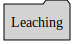

In [2]:
'''Setup Leaching stand-alone'''
import unit
from white_mesa.leaching import Leaching 
leaching = Leaching()
white_mesa_net.module(leaching) 
white_mesa_net.draw(engine='circo', node_shape='folder', ports=True)

In [3]:
'''Run White Mesa and shutdown'''
leaching.end_time = 2*unit.day
white_mesa.run()
white_mesa.close()

[15533] 2023-12-21 19:30:23,896 - cortix - INFO - Launching Module <white_mesa.leaching.Leaching object at 0x7f37507bac90>
[15533] 2023-12-21 19:30:23,905 - cortix - INFO - Leaching::run():time[d]=0.0
[15533] 2023-12-21 19:30:24,032 - cortix - INFO - Leaching::run():time[d]=0.0
[15533] 2023-12-21 19:30:24,131 - cortix - INFO - Leaching::run():time[d]=0.1
[15533] 2023-12-21 19:30:24,238 - cortix - INFO - Leaching::run():time[d]=0.1
[15533] 2023-12-21 19:30:24,344 - cortix - INFO - Leaching::run():time[d]=0.2
[15533] 2023-12-21 19:30:24,447 - cortix - INFO - Leaching::run():time[d]=0.2
[15533] 2023-12-21 19:30:24,551 - cortix - INFO - Leaching::run():time[d]=0.2
[15533] 2023-12-21 19:30:24,651 - cortix - INFO - Leaching::run():time[d]=0.3
[15533] 2023-12-21 19:30:24,761 - cortix - INFO - Leaching::run():time[d]=0.3
[15533] 2023-12-21 19:30:24,865 - cortix - INFO - Leaching::run():time[d]=0.4
[15533] 2023-12-21 19:30:24,967 - cortix - INFO - Leaching::run():time[d]=0.4
[15533] 2023-12-21 

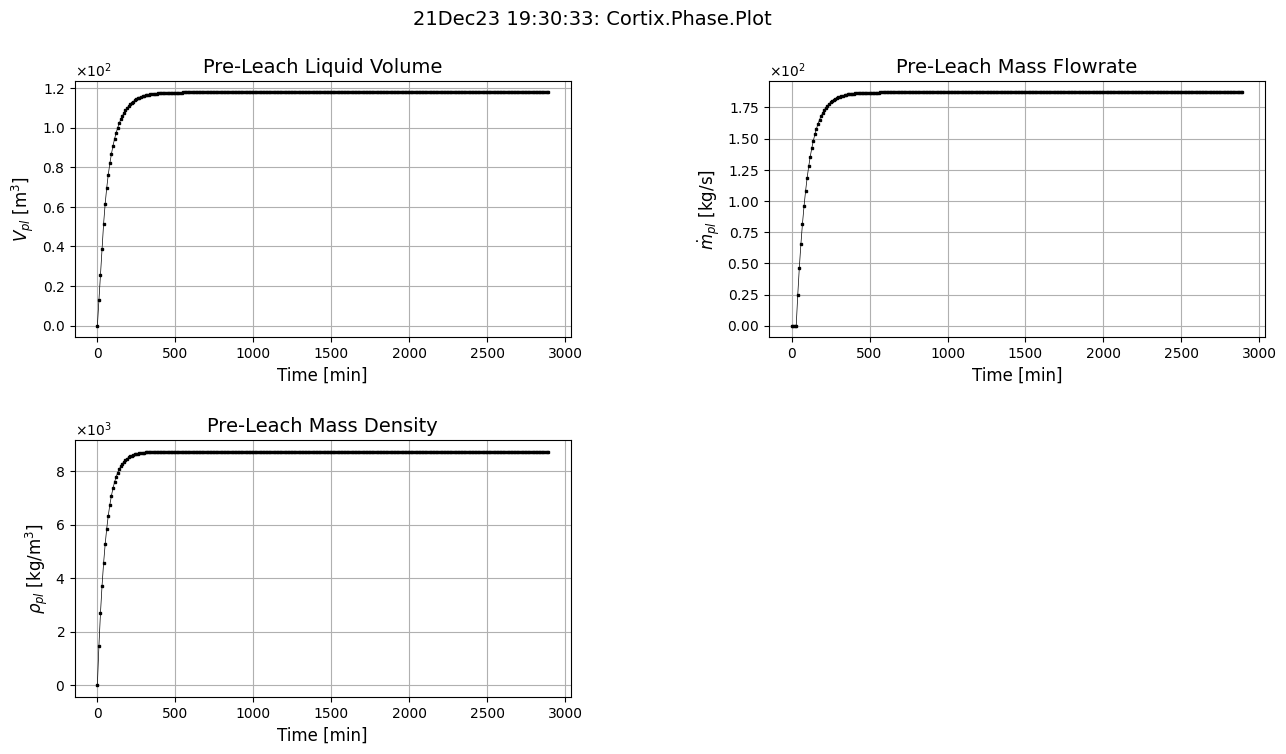

In [4]:
'''Recover Leaching and plot'''
leaching = white_mesa_net.modules[0]
leaching.preleach_phase.plot(['liquid-volume','mass-flowrate','mass-density'],show=True,figsize=[14,8])

### [Decantation/Filtration](#toc)<a id="clear"></a>


The filtration module consists of two main parts; the decantation flows and the filtration flows. Since the initial output from the leaching process contains particles that are too large to effectively remove via filtration, White Mesa first uses a step called counter-current decantation to act as a coarser filter for solids.[3] 


__Counter Current Decantation__
 

The counter current decantation process takes advantage of the process of settling to separate solid impurities from an aqueous fluid stream by diluting it with water. As the liquid stream passes through a stage, known also as a ‘thickener’, the solids begin to descend to the underflow portion of the stage. Ideally, a minimal number of solid impurities remain in the clarified stream as it passes through the overflow stream on the top of the apparatus. 

Cn=C1−Cw/(1+WR+WR^2+…+WR^n)
 Equation D.1 

As seen in equation D.1, the calculation for the concentration depends on; n - the number of stages used, WR – the wash ratio per stage, Cn – the concentration at stage n (ppm), C1 – the initial concentration (ppm), and Cw – the concentration in the wash water (ppm).[6] Therefore, the equation in the code for the module can allow for a manual change of the number of stages used in order to change the quality of the produced product for experimental purposes. By default, the set number of stages will be based on the typical quality produced at White Mesa. 




<nop/> <div style="width: 500px;">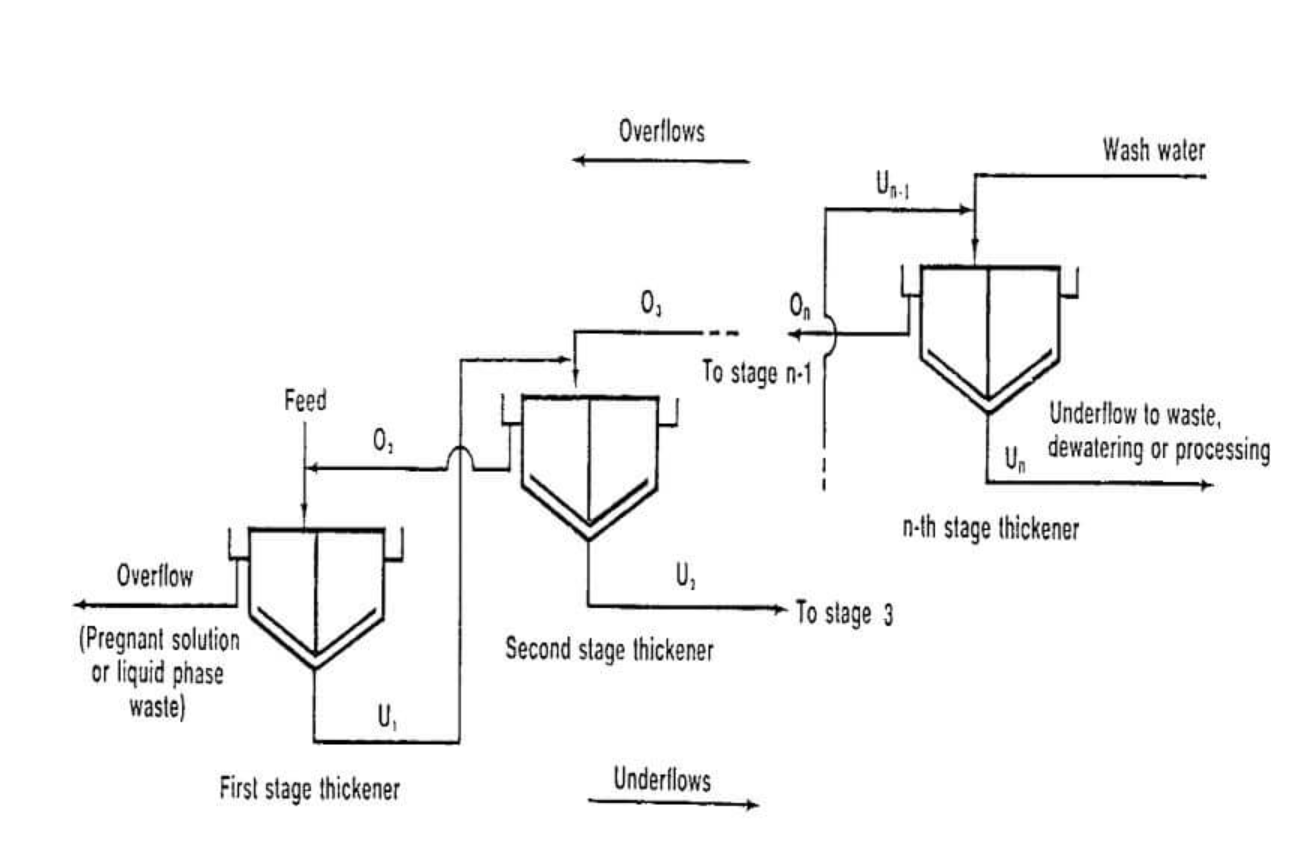</div>
 

Figure D.1 - Continuous Countercurrent Decantation Loop with Wash water Streams 

As the name implies, the wash water is run counter currently to the feed to ensure the maximum stream quality at the bottom stage when it overflows. This can be seen in Figure D.1 with the added possibility to add ascending stages to reach a better final concentration. In order to make this a time dependent process, the wash ratio per stage (or the change in concentration per stage) is found using Navier-Stoke's law for the settling velocity of solids. 

 
Stoke’s Law for Settling Solids  Equation D.2

This settling velocity can then be multiplied by the cross-sectional area of the thickener to determine the volumetric flow rate of sediment loss, and by extension the change in concentration of the feed stream. There are two separete decanter processes that need to be modeled. The first is a single tank that takes in feed from pre-leaching, sending its underflow to acid leaching for further processing and the overflow into a vacuum drum filter to reduce the ppm of solids to 10. The second decanter process takes in the reprocessed feed from acid leaching and sends the overflow back to pre-leaching with a smaller concentration of solids. The underflow from this process can be discarded as tailings.

__Filtration__ 

Uranium filtration is the separation of solids from a slurry stream that allows liquid through pores. This step of the nuclear fuel cycle comes after the initial leaching and rough decantation of the raw ore and prepares the product stream by further purifying it before it is sent to a solvent extraction device. If the presence of impurities reaches 200ppm it can lead to column plugging which can halt the solvent extraction process entirely, so the accepted practice is to keep the value at 10ppm or less. The unit operation involved is a rotary filter with a porous membrane rotating in and out of the slurry mixture that continuously purifies the feed. The filtration rate of the bulk system is controlled via the use of induced vacuum through the drum or added pressure to the stream.[3] 

The open pit and heap leaching processes disturb a large piece of the environment relative to what is extracted for fuel. As a result, most of the removed impurities are recovered as tailings. There are environmental requirements for the quality of tailings such as the maximum allowable ppm of harmful acids, therefore the contents of the tailings can be modelled both to account for the overall mass balance and the environmental requirements for safe operation. 

A pressure based constant rate filtration model has the form: 

ΔP = μαcA2qV+μRAq 
 Equation F.1 

Where ΔP is the pressure drop over the cake and filter (Pa), μ is filtrate viscosity (Pa*s), α is the average specific resistance (m/kg), A is the filter area, q is the filtrate flow rate (m^3/s), V is filtrate volume (m^3), c is the average dry cake mass per unit volume of filtrate (kg/m^3), and R is the filter’s medium resistance (m^-1). Since there is a limit to the operating pressure in the system, the maximum pressure difference is the upper bound limit. The increase in resistance to filtration due to the buildup of cake is pressure dependent, as explained in Darcy’s law of cake filtration. Rotary drum filtration is the best option due to its increased permeation rate that increases as a result of the tangential style of contact with the liquid stream. 



Filtration Rate Equation F.2

The total time of a cycle through the drum is typically 3-6x the cake formation time. Typical inputs from the leaching process include soluble uranyl carbonate complex ion [UO2(CO3)3]4- dissolved in (typically) sulfuric acid. Impurities in the liquor are metals, such as vanadium, molybdenum, thorium, aluminum, gold, copper, and iron as well as sulfate ions. The equation can be rearranged to solve for the flowrate of clean feed liquid. This equation represents the rate of production, or the effective output of solvent-extraction ready aqueous solution containing the uranyl sulfate from leaching. It can also be used to find the amount of residue removed in the cake, which should amount to 90% of the post-CCD concentration of impurities. The module will contain the input and output streams that connect it to leaching and solvent extraction respectively, but a separate waste stream will also be produced with its own level of purity to ensure full accountability for all uranium-based materials. 

__Constructing the Module__

The contents consisting of time dependent equations, state properties, and phase histories are kept in a 'decantation_filtration.py' file. This handles all of the calculations required to update the values of solid ppm, mass flow rate, and mass density of each of the input and output streams for each time step. There is a separate 'run' file that is capable of starting up and terminating the simulation over a set period of time called 'run_decantation_filtration.py'. This 'run' file is also capable of generating graphs to visually represent the change of data over time. A single run file called 'run_plant' is capable of running all of the module run files simultaneously.

For the single tank decantation, there are dynamic equations for the concentration of solids in the streams being sent to acid-leaching and filtration.

C<sub>ov</sub>(t) = 100 + (C<sub>pl</sub> - 100)e<sup>-t/τ</sup>          Eqn F.2

C<sub>al</sub>(t) = 9900 + (C<sub>pl</sub> - 9900)e<sup>-t/τ</sup>          Eqn F.3

Where C<sub>ov</sub> = concentration of solids in the overflow of the single tank that is sent to filtration, C<sub>pl</sub> = concentration of solids in the preleach feed to the tank, t = time, τ = time taken to fill the tank at the current flowrate, and C<sub>al</sub>(t) = concentration of solids being sent to acid leaching in the underflow. 

Equations F.2 and F.3 represent the concentration of solids in the single tank's underflow and overflow as a function of time respectively, with a flow residence time term that takes into account the initial variations in feed concentration. The tank is designed to maintain a near-constant performance once the tank is filled, making the τ exponential term become less influencial over time.

There are also two dynamic equations for the mass flowrate in the streams being sent to acid-leaching and filtration based on the component balance for solids. 

m<sub>ov</sub> = 1/(C<sub>al</sub>/C<sub>f</sub> + 1)*m<sub>pl</sub>  Eqn F.4
    
m<sub>al</sub> = (C<sub>al</sub>/C<sub>f</sub>)/ (C<sub>al</sub>/C<sub>f</sub> + 1)*m<sub>pl</sub>  Eqn F.5

Where m<sub>ov</sub> = mass flowrate of overflow to filration, m<sub>pl</sub> = mass flowrate of the feed from pre-leaching, and m<sub>al</sub> = flow rate of underflow to acid leaching. These equations maintain the ratio of overflow to underflow at 1:99, showing that there is relatively little aqueous solution being sent immediately to filtration.

For the 7 counter current tank decantation, there are dynamic equations for the concentration of solids in the streams being sent to pre-leaching and tailings.

C<sub>ccd</sub>(t) = 99 + (C<sub>feed</sub> - 99)e<sup>-t/τ</sup>          Eqn F.6

C<sub>T</sub>(t) = 9801 + (C<sub>feed</sub> - 9801)e<sup>-t/τ</sup>          Eqn F.7

Where C<sub>ccd</sub> = concentration of solids in the overflow of the CCD system that is sent to pre-leaching, C<sub>T</sub> = concentration of solids in the tailings, t = time, τ = time taken to fill the 7 tanks at the current flowrate, and C<sub>feed</sub>(t) = concentration of solids being fed to the CCD system.

Equations F.6 and F.7 represent the concentration of solids in the CCD underflow and overflow as a function of time respectively, with a flow residence time term that takes into account the initial variations in feed concentration. The tanks are designed to maintain a near-constant performance once filled, making the τ exponential term become less influencial over time.

There are also two dynamic equations for the mass flowrate in the streams being sent to pre-leaching and tailings based on the component balance for solids. 

m<sub>ccd</sub> = 1/(C<sub>ccd</sub>/C<sub>T</sub> + 1)*m<sub>feed</sub>  Eqn F.8
    
m<sub>T</sub> = (C<sub>ccd</sub>/C<sub>T</sub>)/ (C<sub>ccd</sub>/C<sub>T</sub> + 1)*m<sub>feed</sub>  Eqn F.9

Where m<sub>ccd</sub> = mass flowrate of overflow to pre-leaching, m<sub>feed</sub> = the mass flowrate of the feed coming from acid-leaching, and m<sub>T</sub> = flow rate of underflow to tailings.


In [5]:
'''Setup a White Mesa plant'''
from cortix import Cortix
from cortix import Network
white_mesa = Cortix(use_mpi=False, splash=True) # System top level
white_mesa_net = white_mesa.network = Network() # Network

[15533] 2023-12-21 19:30:55,697 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

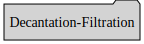

In [6]:
'''Setup Decantation-Filtration stand-alone'''
import unit
from white_mesa.decantation_filtration import DecantationFiltration
decant_filt = DecantationFiltration()
white_mesa_net.module(decant_filt) 
white_mesa_net.draw(engine='circo', node_shape='folder', ports=True)

In [7]:
'''Run White Mesa and shutdown'''
decant_filt.end_time = 8*unit.day
white_mesa.run()
white_mesa.close()

[15533] 2023-12-21 19:31:04,310 - cortix - INFO - Launching Module <white_mesa.decantation_filtration.DecantationFiltration object at 0x7f371949b6d0>
[15533] 2023-12-21 19:31:04,316 - cortix - INFO - Decantation-Filtration::run():time[d]=0.0
[15533] 2023-12-21 19:31:04,567 - cortix - INFO - Decantation-Filtration::run():time[d]=0.0
[15533] 2023-12-21 19:31:04,811 - cortix - INFO - Decantation-Filtration::run():time[d]=0.1
[15533] 2023-12-21 19:31:05,060 - cortix - INFO - Decantation-Filtration::run():time[d]=0.1
[15533] 2023-12-21 19:31:05,313 - cortix - INFO - Decantation-Filtration::run():time[d]=0.2
[15533] 2023-12-21 19:31:05,567 - cortix - INFO - Decantation-Filtration::run():time[d]=0.2
[15533] 2023-12-21 19:31:05,852 - cortix - INFO - Decantation-Filtration::run():time[d]=0.2
[15533] 2023-12-21 19:31:06,121 - cortix - INFO - Decantation-Filtration::run():time[d]=0.3
[15533] 2023-12-21 19:31:06,413 - cortix - INFO - Decantation-Filtration::run():time[d]=0.3
[15533] 2023-12-21 19:

[15533] 2023-12-21 19:31:26,954 - cortix - INFO - Decantation-Filtration::run():time[d]=3.7
[15533] 2023-12-21 19:31:27,229 - cortix - INFO - Decantation-Filtration::run():time[d]=3.7
[15533] 2023-12-21 19:31:27,479 - cortix - INFO - Decantation-Filtration::run():time[d]=3.8
[15533] 2023-12-21 19:31:27,737 - cortix - INFO - Decantation-Filtration::run():time[d]=3.8
[15533] 2023-12-21 19:31:27,988 - cortix - INFO - Decantation-Filtration::run():time[d]=3.8
[15533] 2023-12-21 19:31:28,242 - cortix - INFO - Decantation-Filtration::run():time[d]=3.9
[15533] 2023-12-21 19:31:28,483 - cortix - INFO - Decantation-Filtration::run():time[d]=3.9
[15533] 2023-12-21 19:31:28,740 - cortix - INFO - Decantation-Filtration::run():time[d]=4.0
[15533] 2023-12-21 19:31:28,995 - cortix - INFO - Decantation-Filtration::run():time[d]=4.0
[15533] 2023-12-21 19:31:29,257 - cortix - INFO - Decantation-Filtration::run():time[d]=4.0
[15533] 2023-12-21 19:31:29,511 - cortix - INFO - Decantation-Filtration::run():

[15533] 2023-12-21 19:31:50,597 - cortix - INFO - Decantation-Filtration::run():time[d]=7.4
[15533] 2023-12-21 19:31:50,875 - cortix - INFO - Decantation-Filtration::run():time[d]=7.5
[15533] 2023-12-21 19:31:51,152 - cortix - INFO - Decantation-Filtration::run():time[d]=7.5
[15533] 2023-12-21 19:31:51,416 - cortix - INFO - Decantation-Filtration::run():time[d]=7.5
[15533] 2023-12-21 19:31:51,704 - cortix - INFO - Decantation-Filtration::run():time[d]=7.6
[15533] 2023-12-21 19:31:51,974 - cortix - INFO - Decantation-Filtration::run():time[d]=7.6
[15533] 2023-12-21 19:31:52,241 - cortix - INFO - Decantation-Filtration::run():time[d]=7.7
[15533] 2023-12-21 19:31:52,499 - cortix - INFO - Decantation-Filtration::run():time[d]=7.7
[15533] 2023-12-21 19:31:52,779 - cortix - INFO - Decantation-Filtration::run():time[d]=7.8
[15533] 2023-12-21 19:31:53,065 - cortix - INFO - Decantation-Filtration::run():time[d]=7.8
[15533] 2023-12-21 19:31:53,326 - cortix - INFO - Decantation-Filtration::run():

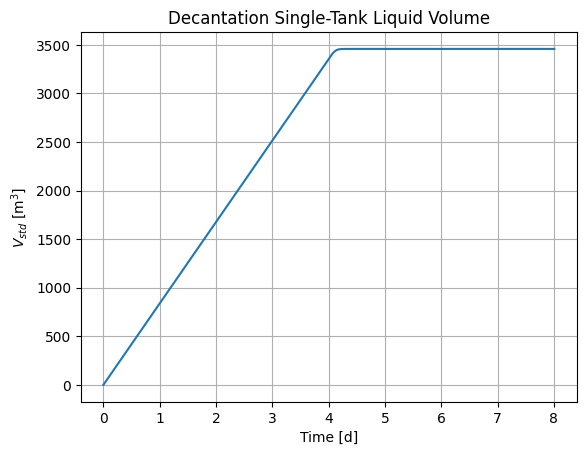

In [8]:
'''Recover Decantation/Filtration and plot'''
import matplotlib.pyplot as plt
decant_filt = white_mesa_net.modules[0]
(quant, time_unit) = decant_filt.std_state_phase.get_quantity_history('liquid-volume')
quant.plot(x_scaling=1/unit.day, x_label='Time [d]',y_label=quant.latex_name+' ['+quant.unit+']')
plt.grid()

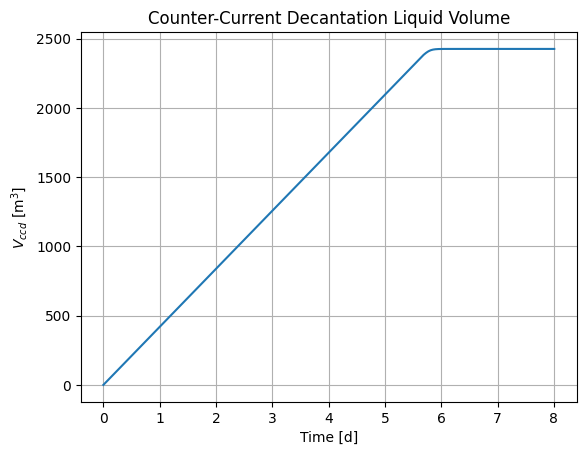

In [9]:
(quant, time_unit) = decant_filt.ccd_state_phase.get_quantity_history('liquid-volume')
quant.plot(x_scaling=1/unit.day, x_label='Time [d]',y_label=quant.latex_name+' ['+quant.unit+']')
plt.grid()

### [Solvent Extraction](#toc)<a id="solvent"></a>

```python
                              |
                              |  Extraction Feed (from Decantation-Filtration filtrate)
                              |
                              v
                      |----------------|
                      |                |
 Organic Feed ------->|                |------> Organic Product (to Scrubbing internal)
 (internal source)    |    Solvent     |
                      |   Extraction   |
 Raffinate <----------|                |<------ Scrub Raffinate (from Scrubbing internal)
 Stream (to CCD Bank) |                |
                      |----------------|
  Organic Product <---|                |<------ Organic Feed (Organic Product from Solv. Extr. internal)
  (to Strip internal) |                |
                      |   Scrubbing    |
   Scrub Feed ------->|                |-------> Scrub Raffinate (to Solvent Extraction internal)
   (internal source)  |                |
                      |----------------|
  Organic Feed ------>|                |-------> Organic Regeneration (to Solvent Extraction not done)
(from Scrub internal) |   Stripping    |
                      |                |<------ Stripping Feed (internal source)
                      |________________|<------ Stripping Feed (from Precipitation not implemented)
                              |
                              |
                              |
                              v
                       Stripping Product (Precipitation feed)
```

In [ ]:
!cat white_mesa/solvex.py

Solvent extraction, also called liquid-liquid equilibrium or liquid-liquid extraction, is a method used to separate a compound from two immiscible liquids. These two liquids are typically an aqueous solution and an organic solvent. Extraction is performed based on the relative solubility of the solute in the two liquids with the driving force being chemical potential as the resulting products are more stable than the initial solution. This process is commonly performed in separatory funnels or in countercurrent mixer settler units.

The solvent extraction of uranium uses the filtered pregnant liquor as the aqueous solution with the solute being uranium. The solvent in this case is an organic phase consisting of an amine salt diluted in kerosene that has been modified with an alcohol. The amine salt binds to the uranium compound which is more soluble in the organic phase thus removing it from the aqueous phase. Research shows that the best extractants for uranium are either Adogen 363 or Alamine 336, both of which are tertiary amines. These two compounds are excellent at extracting uranium while leaving behind most other impurities such as iron. In White Mesa, the organic phase consists of Alamine 336 diluted with kerosene modified with isodecanol. Alamine 336, also known as Trioctylamine.
<br></br>
<center>UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub><sup>4-</sup> + 2(R<sub>3</sub>NH<sup>+</sup>)<sub>2</sub>SO<sub>4</sub> → (R<sub>3</sub>NH<sup>+</sup>)<sub>4</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub> + 2SO<sub>4</sub><sup>2-</sup></center>

From this equation the UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub><sup>4-</sup> is the feed stream from the filtration module. The product of solvent extraction is (R<sub>3</sub>NH<sup>+</sup>)<sub>4</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub> with the other product exiting as a waste stream. One problem with this technique is the extraction of molybdenum is preferred to uranium and must be removed. This solution can be introduced to a stripping column to increase the purity of the solution through the removal of molybdenum. The selective stripping of uranium from the solution can be seen with the chemical reaction below.
<br></br>
<center>(R<sub>3</sub>NH<sup>+</sup>)<sub>4</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub> + 4NH<sub>4</sub>OH ⇌ 4R<sub>3</sub>N + 4H<sub>2</sub>O + (NH<sub>4</sub>)<sub>2</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>2</sub> + (NH<sub>4</sub>)<sub>2</sub>SO</center>

The resulting product from the stripping column is (NH<sub>4</sub>)<sub>2</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>2</sub> and is now ready to be fed into the precipitation stage where the sulfate will be removed from the compound to be precipitated into U<sub>3</sub>O<sub>8</sub>.

### [Precipitation](#toc)<a id="precip"></a>

### [Evaporation/Calcining](#toc)<a id="evap"></a>

Evaporation is a process in which an element or compound transitions from its liquid state to its gaseous state below the temperature at which it boils. However, the form of drying we will be dealing with in this stage of the process is working with a reactant that has become mostly solid thanks to the precipitation process. Thus, this section will mainly focus on the calcination process. Calcination is the heating of solids to a high temperature for the purpose of removing volatile substances.
<br>
The conditions used for drying and calcining ammonium diuranate and uranium peroxide are listed below:
<br>
<br>
<p style="text-align:center;"><b>Table 2: Parameter for Calcining and Drying of Precipitation Products.</b></p>
<img width="400" src="pics/Calciner-Drying-Table.png" title="Calcining/Drying Table">
<br> 
Most of the mill operations in the USA that precipitate ammonium diuranate from sodium chloride strip solutions operate calciners at elevated temperatures to eliminate chloride contamination and to produce a dense product. It should be noted that several mill operations that precipitate ammonium diuranate from ammonium sulfate strip solutions are able to calcine at lower temperatures and produce products within all specifications listed in the table above. The process to create the ammonium dinitrate requires an addition of an ammonia solution, thus the precipitation reaction can occur with uranyl sulfate as mentioned before.

The production of ammonium diuranate effectively leads to the evaporation process to produce triuranium octoxide. The wet concentrate that is produced from the precipitation reaction is dried, or calcined, to later be packaged in steel drums with a polyethylene liner. Most operations calcine their ammonium diuranate or hydrogen peroxide precipitated products. 

An example of an overall calcining of incoming ammonium diuranate is shown in the diagram based out of Key Lake below:
<br>
<br>
<img width="400" src="pics/Calciner-Tank-Process.png" title="Calciner Tank">
<p style="text-align:center;"><b>Figure 4: Calciner Tank Process at Key Lime Uranium Mill.</b></p>
<br>
This production happens in large molar quantities, and assuming a 100% conversion rate every 100 kgs of ammonium diuranate will result in 90 kgs of triuranium octoxide. High temperature calcining is practiced producing a greater than 95% U<sub>3</sub>O<sub>8</sub> product having high density [3].

The reaction of this heating process is as follows:

Production of Triuranium Octoxide
</br>
</br>
<center>9(NH<sub>4</sub>)<sub>2</sub>U<sub>2</sub>0<sub>7</sub> → 14NH<sub>3</sub> + 15H<sub>2</sub>O + 2N<sub>2</sub> + 6U<sub>3</sub>O<sub>8</sub></center>
</br>
Calcination eliminates water completely, and drives off the ammonia, but care must be taken not to sinter the product.

Sintering can significantly reduce nitric acid solubility, which is critical for some refining processes. Several types of drying equipment have been used in the calcining process, typically arranged in the series of dryers that succeed the main calciner tank. These include single or multiple hearth dryers, drum dryers, belt dryers, screw dryers and radiant heat dryers.
There also becomes the problem of how to dispose of the ammonia produced. As seen in figure 4, the solution to the produced ammonia is to add a form of fluid bed dryer to the calciner tank to extract the ammonia vapor.’


## [Startup](#toc)<a id="su"></a>

## [Steady State](#toc)<a id="ss"></a>

## [Disturbance](#toc)<a id="malfunction"></a>

## [References](#toc)<a id="refs"></a>



- [1] V. F. de Almeida, [Cortix](https://cortix.org), *Network Dynamics Simulation*, University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear program).
- [2] V. F. de Almeida, [*Engy-4350: Nuclear Reactor Engineering*](https://github.com/dpploy/engy-4350), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Program).
- [3] “35 No. 9 Uranium Extraction Technology - IAEA.” Uranium Extraction Technology, IAEA, 1993, www.pub.iaea.org/MTCD/Publications/PDF/trs359_web.pdf. 
- [4] “NRC: Conventional Uranium Mills.” Www.nrc.gov, www.nrc.gov/materials/uranium-recovery/extraction-methods/conventional-mills.html.
- [5] “STATE OF UTAH RADIOACTIVE MATERIALS LICENSE No. UT1900479 .” White Mesa Uranium Mill - License Renewal, Denison Mines Corp., 2007, www.documents.deq.utah.gov/legacy/businesses/e/energy-fuels-resources-usa/docs/2014/index.html. 